In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

(train_images, train_labels),(test_images,test_labels)=cifar10.load_data()

In [28]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
train_images=train_images/255
test_images=test_images/255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.3, random_state=42)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


model=models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),epochs=50,validation_data=(val_images, val_labels))

Epoch 1/50
547/547 [==============================] - 23s 40ms/step - loss: 2.0661 - accuracy: 0.2244 - val_loss: 1.9161 - val_accuracy: 0.2951
Epoch 2/50
547/547 [==============================] - 20s 37ms/step - loss: 1.9068 - accuracy: 0.3021 - val_loss: 1.8399 - val_accuracy: 0.3304
Epoch 3/50
547/547 [==============================] - 21s 38ms/step - loss: 1.8442 - accuracy: 0.3315 - val_loss: 1.7622 - val_accuracy: 0.3654
Epoch 4/50
547/547 [==============================] - 21s 38ms/step - loss: 1.7855 - accuracy: 0.3556 - val_loss: 1.6914 - val_accuracy: 0.3977
Epoch 5/50
547/547 [==============================] - 21s 38ms/step - loss: 1.7463 - accuracy: 0.3731 - val_loss: 1.6447 - val_accuracy: 0.4092
Epoch 6/50
547/547 [==============================] - 21s 39ms/step - loss: 1.7049 - accuracy: 0.3911 - val_loss: 1.6299 - val_accuracy: 0.4228
Epoch 7/50
547/547 [==============================] - 23s 41ms/step - loss: 1.6776 - accuracy: 0.4005 - val_loss: 1.5895 - val_accuracy:

In [30]:
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.3816 - accuracy: 0.5105


In [32]:
y_pred=model.predict(test_images)
y_pred_classes=tf.argmax(y_pred,axis=1)
y_true=tf.argmax(test_labels,axis=1)

report=classification_report(y_true,y_pred_classes)
print(report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1000
           1       0.60      0.60      0.60      1000
           2       0.44      0.38      0.41      1000
           3       0.37      0.35      0.36      1000
           4       0.49      0.36      0.42      1000
           5       0.48      0.36      0.42      1000
           6       0.49      0.68      0.57      1000
           7       0.59      0.52      0.55      1000
           8       0.53      0.73      0.61      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



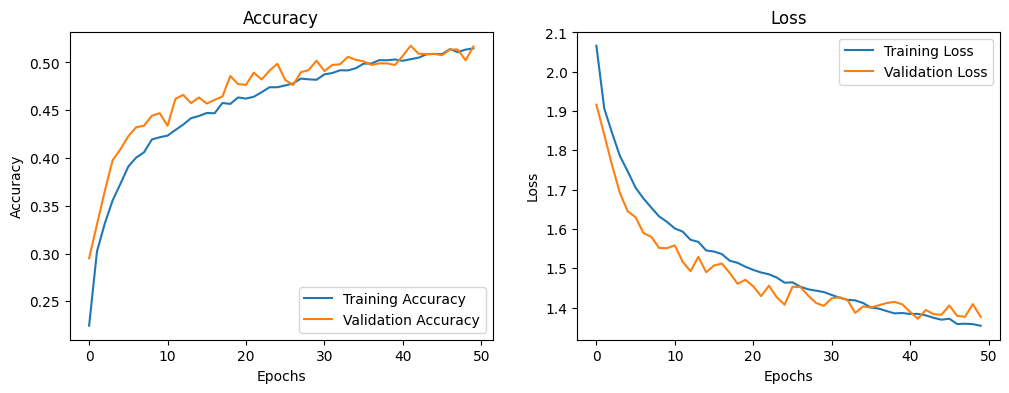

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [41]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# def load_model():
#     global model
#     model=tf.keras.models.load_model("cifar10.h5")

def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path).convert('RGB')  
            img_resized = img.resize((32, 32))
            img_array = np.array(img_resized) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            # Debugging statements
#             print(f"Image shape after reshape: {img_array.shape}")
#             print(f"Image array after reshape and normalize: {img_array}")
            
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0]
            result_label.config(text=f'Predicted Class: {predicted_class}')
            
            class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                           'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
            predicted_label = class_names[predicted_class]
            result_label.config(text=f'Predicted Class: {predicted_label}')
            
            img_display = ImageTk.PhotoImage(img)
            image_label.config(image=img_display)
            image_label.image = img_display  
        except Exception as e:
            print(f"Error processing image: {e}")
            result_label.config(text=f"Error: {e}")

root = tk.Tk()
root.title('CIFAR-10 Image Classifier')

open_button = tk.Button(root, text="Open Image", command=open_image)
open_button.pack()

image_label = tk.Label(root)
image_label.pack()

result_label = tk.Label(root, text='Predicted Class: ')
result_label.pack()

root.mainloop()


1/1 [==============================] - 0s 29ms/step
